In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def numerical_int(accel_xyz, tdata):
    '''
    This is just vanilla integration of whatever you give it, and integrates twice
    E.g. goes from acceleration to position
    
    accel_xyz is a 3x1 vector of all the accelerations in the XYZ for the rows
    '''
    
    ax_vn, ay_vn, az_vn = accel_xyz[0], accel_xyz[1], accel_xyz[2]

    vx_vn, vy_vn, vz_vn = np.zeros(len(ax_vn)),np.zeros(len(ay_vn)), np.zeros(len(az_vn))
    x_vn, y_vn, z_vn = np.zeros(len(ax_vn)),np.zeros(len(ay_vn)), np.zeros(len(az_vn))
    dt = tdata[1]

    vx_vn = integrate.cumtrapz(ax_vn, tdata, initial=0)
    vy_vn = integrate.cumtrapz(ay_vn, tdata, initial=0)
    vz_vn = integrate.cumtrapz(az_vn, tdata, initial=0)

    x_vn = integrate.cumtrapz(vx_vn, tdata, initial=0)
    y_vn = integrate.cumtrapz(vy_vn, tdata, initial=0)
    z_vn = integrate.cumtrapz(vz_vn, tdata, initial=0)
    
    v_vec = [vx_vn, vy_vn, vz_vn]
    x_vec = [x_vn, y_vn, z_vn]
    
    return v_vec, x_vec

In [5]:
################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

################## DATA FRAME ##################
datafile = 'gyro_90_deg_turn.csv'
fields = ['Accel X', 'Accel Y', 'Accel Z', 'Gyro X', 'Gyro Y', 'Gyro Z', 'Time']
df = pd.read_csv(datafile, header=None)
df.columns = fields

################## INIT VECTORS ##################
tdata = df['Time']

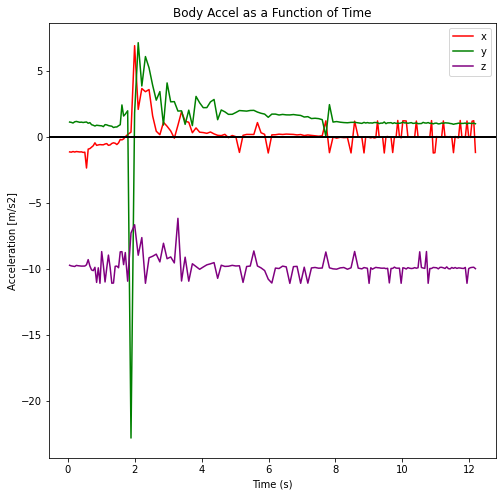

In [7]:
ax = df['Accel X']
ay = df['Accel Y']
az = df['Accel Z']

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ax, color='red', label='x')
l3 = ax.plot(tdata, ay, color='green', label='y')
l4 = ax.plot(tdata, az, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Body Accel as a Function of Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [m/s2]")
ax.legend()
plt.show()

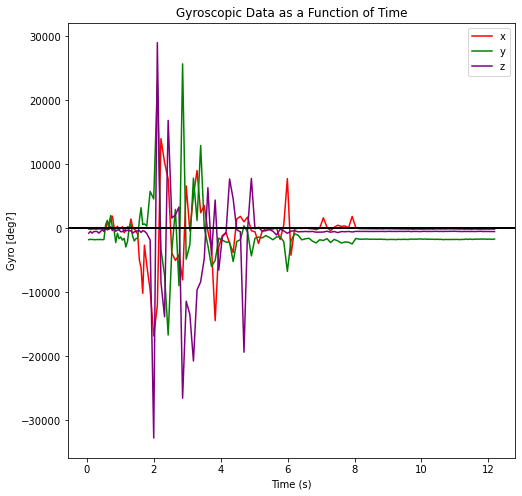

In [11]:
gx = df['Gyro X']
gy = df['Gyro Y']
gz = df['Gyro Z']

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, gx, color='red', label='x')
l3 = ax.plot(tdata, gy, color='green', label='y')
l4 = ax.plot(tdata, gz, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Gyroscopic Data as a Function of Time")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Gyro [deg?]")
ax.legend()
plt.show()

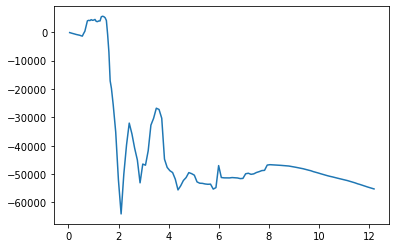

In [12]:
gx_cum = gx.cumsum()
plt.plot(tdata, gx_cum)

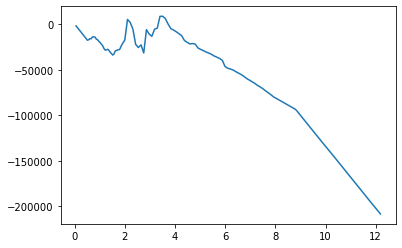

In [15]:
gy_cum = gy.cumsum()
plt.plot(tdata, gy_cum)

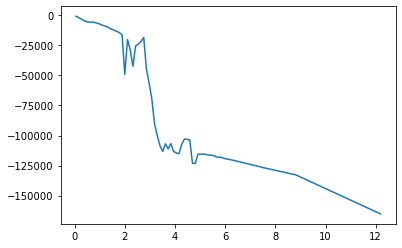

In [16]:
gz_cum = gz.cumsum()
plt.plot(tdata, gz_cum)

In [25]:
conv_factor = 90/125000
conv_factor

0.00072

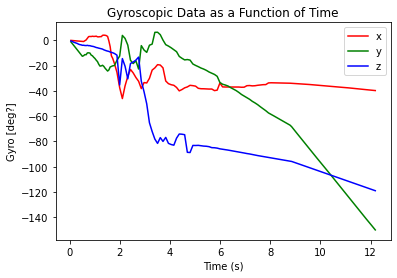

In [27]:
plt.plot(tdata, gx_cum*conv_factor, color='red', label='x')
plt.plot(tdata, gy_cum*conv_factor, color='green', label='y')
plt.plot(tdata, gz_cum*conv_factor, color='blue', label='z')
plt.title("Gyroscopic Data as a Function of Time")
plt.xlabel('Time (s)')
plt.ylabel("Gyro [deg?]")
plt.legend()
plt.show()

In [33]:
################## DATA FRAME ##################
datafile = 'LSM_drop_calibrated.csv'
fields = ['Accel X', 'Accel Y', 'Accel Z', 'Gyro X', 'Gyro Y', 'Gyro Z', 'Time']
df = pd.read_csv(datafile, header=None)
df.columns = fields

################## INIT VECTORS ##################
tdata = df['Time']

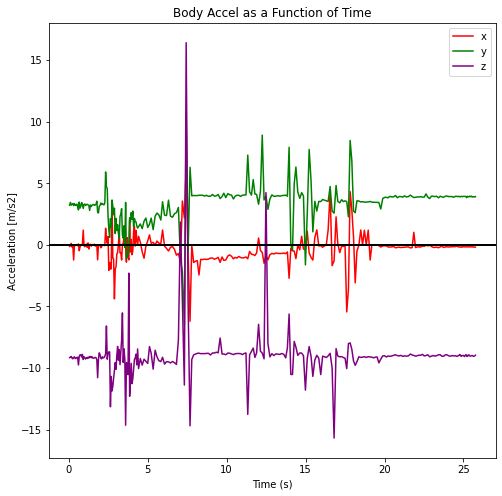

In [34]:
ax = df['Accel X']
ay = df['Accel Y']
az = df['Accel Z']

fig1 = plt.figure(1, figsize=(8,8))
axe = plt.subplot(111)
l2 = axe.plot(tdata, ax, color='red', label='x')
l3 = axe.plot(tdata, ay, color='green', label='y')
l4 = axe.plot(tdata, az, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
axe.set_title("Body Accel as a Function of Time")
axe.set_xlabel('Time (s)')
axe.set_ylabel("Acceleration [m/s2]")
axe.legend()
plt.show()

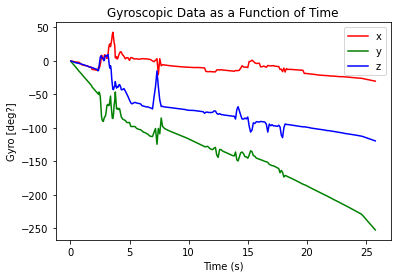

In [35]:
gx = df['Gyro X']
gy = df['Gyro Y']
gz = df['Gyro Z']

gx_cum = gx.cumsum()
gy_cum = gy.cumsum()
gz_cum = gz.cumsum()

plt.plot(tdata, gx_cum*conv_factor, color='red', label='x')
plt.plot(tdata, gy_cum*conv_factor, color='green', label='y')
plt.plot(tdata, gz_cum*conv_factor, color='blue', label='z')
plt.title("Gyroscopic Data as a Function of Time")
plt.xlabel('Time (s)')
plt.ylabel("Gyro [deg?]")
plt.legend()
plt.show()